In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.text import *

In [0]:
bs = 10
path = '/content/drive/My Drive/Datasets/Liar'
data_lm = TextLMDataBunch.from_csv(path, 'trainfinal.csv', text_cols = 1)

In [0]:
data_lm.show_batch()

idx,text
0,"a trillion dollars , he would hold unemployment below 8 percent . xxbos xxmaj when ( xxmaj ronald ) xxmaj reagan came in , from 1978 to 1982 , economic growth averaged less than 1 percent a year . xxmaj there s only one other four - year period where that s true . xxmaj that s true from 2008 to 2012 . xxbos xxmaj under xxmaj republicans , recessions"
1,"xxbos xxmaj on support for ethanol mandates xxbos xxmaj says nobody in higher education believes xxmaj gov. xxmaj rick xxmaj perrys proposal to serve up $ 10,000 college degrees is possible . xxbos xxmaj says xxmaj xxunk xxmaj xxunk was nominated to serve as a judge on the xxup u.s. xxmaj circuit xxmaj court of xxmaj appeals and was xxunk withdrawn by the administration . xxbos xxmaj xxunk xxmaj xxunk"
2,"says his xxunk of xxmaj paint xxmaj xxunk , xxmaj texas , does nt even have a xxup zip code . xxbos xxmaj says xxmaj ron xxmaj johnson voted to turn xxmaj medicare into a voucher program . xxbos xxmaj the 2013 immigration bill expanded xxmaj president xxmaj obamas ability to bring xxmaj syrian refugees to this country without mandating any xxunk background checks . xxbos xxmaj this week the"
3,"can absolutely get a gun if you have several felonies as long as you buy it on the xxmaj internet or at a gun show . xxbos xxmaj president xxmaj obamas health care law represents a government takeover of health care . xxbos xxmaj says xxmaj gov. xxmaj scott xxmaj walker signed abortion , sex education and discrimination bills in secret . xxbos xxmaj texas state xxmaj reps . xxmaj"
4,"xxbos xxmaj there s no negative advertising in my campaign at all . xxbos xxmaj an average of seven children in xxmaj america are killed by guns every day . xxbos a government analysis shows under a proposed transportation tax , metro xxmaj atlanta will create or support an additional 200,000 new jobs , including jobs that are maintained year over year . xxbos xxmaj say xxmaj ohio xxmaj reps"


In [0]:
learn_m = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)

In [0]:
learn_m.lr_find()

In [0]:
learn_m.recorder.plot(skip_end=15)

In [0]:
#learn_m.fit_one_cycle(4, 1e-2, moms=(0.8,0.7))
learn_m.fit_one_cycle(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.414286,3.678842,0.321317,09:04
1,3.779688,3.381839,0.369420,08:56
2,3.387979,3.339459,0.376525,08:53
3,3.158027,3.332176,0.377214,08:52


In [0]:
learn_m.save('sixwaylangmodel_lmf_1_e4')

In [0]:
TEXT = "If you got rid of the income"
N_WORDS = 40
N_SENTENCES = 2

In [0]:
print("\n".join(learn_m.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

If you got rid of the income tax as expected , we could make a good profit . xxbos Says Gov. Scott Walker supports the Keystone XL pipeline . xxbos We have more people working in the private sector than
If you got rid of the income tax today today , it was at a lower rate than the average European family . xxbos In 2010 , the U.S. economy was one of the lowest since World War II . xxbos


In [0]:
learn_m.save_encoder('sixwaylangmodel_lmf_1_e4_enc')

Six way Classifier construction

In [0]:
bs = 10
data_path = '/content/drive/My Drive/Datasets/Liar/'
data_clas = TextClasDataBunch.from_csv(data_path, 'trainfinal.csv', text_cols=1, label_cols=0, vocab = data_lm.train_ds.vocab,bs=32)
data_clas.save('data_clas_lmf_1_csv.pkl')

In [0]:
path ='/content/drive/My Drive/Datasets/Liar'
data_clas = load_data(path, 'data_clas_lmf_1_csv.pkl', bs=16)

In [0]:
data_clas.show_batch()

text,target
"xxbos xxmaj barbara xxmaj buono by the numbers : xxmaj as a xxmaj trenton politician , she voted to raise taxes 154 times . xxmaj under her , property taxes up 70 percent . xxmaj backed a 16 percent sales tax increase . xxmaj utilities , nursing homes , cell phones , parking lots , lottery wins , xxunk xxmaj she taxed them all . xxmaj architect of xxmaj xxunk",mostly-true
"xxbos xxmaj when xxmaj donald xxmaj trump spoke in xxmaj phoenix , he looked the audience in the eye and he said no , were building a wall and were deporting everybody . xxmaj he said , quote , they will all be gone . xxmaj they will all be gone . xxmaj this is one of the ones where you can go to the tape on it and see",half-true
"xxbos xxmaj we spend more money on health care per capita in the xxmaj united xxmaj states than any other country in the world . xxmaj of the 30 developed countries in the world , we spend 2 1 / 2 times more than the average . xxmaj of the country that spends the second most per capita , xxmaj switzerland , we spend 175 percent more .",half-true
"xxbos xxmaj the xxup r.i. xxmaj turnpike and xxmaj bridge xxmaj authority was supposed to exist only until the bonds used to build the xxmaj newport xxmaj bridge were paid off through tolls . xxmaj once the bonds were paid , the xxmaj newport xxmaj bridge was to be transferred to the xxmaj state of xxmaj rhode xxmaj island and become toll - free .",mostly-true
"xxbos xxmaj chicago xxmaj public xxmaj schools lead the country in high school graduation of an urban school system , match the xxmaj united xxmaj states of xxmaj america in kids graduating high school going on to a four - year college , and are producing eighth - grade leaders in the country in math gains , fourth - grade leaders in reading gains .",mostly-true


In [0]:
#data_clas.vocab.itos = data_lm.vocab.itos
learn_c3 = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn_c3.load_encoder('sixwaylangmodel_lmf_1_e4_enc')

In [0]:
learn_c3.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


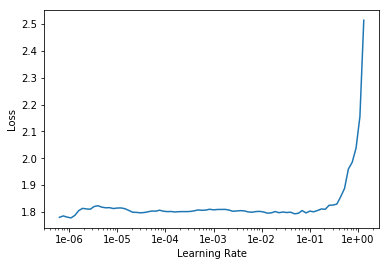

In [0]:
learn_c3.recorder.plot()

In [0]:
#learn_c2.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))
learn_c3.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.741288,1.717358,0.232422,08:10


In [0]:
learn_c3.save('classifier_sixway_lmf_1_e1')

In [0]:
learn_c3.load('classifier_sixway_lmf_1_e1');

In [0]:
learn_c3.freeze_to(-2)
learn_c3.fit_one_cycle(1, slice(5e-3/2., 5e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.721372,1.707962,0.238281,11:22


In [0]:
learn_c3.unfreeze()
learn_c3.fit_one_cycle(1, slice(2e-3/100, 2e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.689436,1.701268,0.247559,32:21


In [0]:
learn_c3.save('classifier_sixway_lmf_1_e3')

In [0]:
learn_c3.load('classifier_sixway_lmf_1_e3');

In [0]:
learn_c3.predict("Seven of Americas 10 wealthiest counties are in the Washington, D.C., area.")

(Category mostly-true,
 tensor(4),
 tensor([0.0950, 0.2561, 0.0474, 0.1852, 0.3992, 0.0170]))